In [0]:
!pip install openai==0.28 shap ipywidgets
import openai
import shap
import ipywidgets as widgets
from IPython.display import display

openai.api_key = "sk-proj--ERASED(REPLACE BEFORE RUNNING)"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.4 MB/s eta 0:00:00


In [0]:
import shap
import openai
import pandas as pd
import numpy as np

In [0]:
from google.colab import files
uploaded = files.upload()

Saving icd9.txt to icd9 (1).txt


In [0]:
# Set working directory for Google Colab
import os

base_path = "/content/medicare-fraud-detection-ds606"
os.chdir(base_path)
print("Working directory set to:", os.getcwd())

Working directory set to: /content/medicare-fraud-detection-ds606


In [0]:
# Clone your private repo using GitHub token
!git clone https://boaboa11:(ERASED, REPLACE BEFORE USING) @github.com/shebeta/medicare-fraud-detection-ds606.git

fatal: destination path 'medicare-fraud-detection-ds606' already exists and is not an empty directory.


In [0]:
import pandas as pd

# Define base path
base_path = "/content/medicare-fraud-detection-ds606"

# Load training datasets
train = pd.read_csv(f"{base_path}/Train-1542865627584.csv")
train_beneficiary = pd.read_csv(f"{base_path}/Train_Beneficiarydata-1542865627584.csv")
train_inpatient = pd.read_csv(f"{base_path}/Train_Inpatientdata-1542865627584.csv")
train_outpatient = pd.read_csv(f"{base_path}/Train_Outpatientdata-1542865627584.csv")

# Load test datasets
test = pd.read_csv(f"{base_path}/Test-1542969243754.csv")
test_beneficiary = pd.read_csv(f"{base_path}/Test_Beneficiarydata-1542969243754.csv")
test_inpatient = pd.read_csv(f"{base_path}/Test_Inpatientdata-1542969243754.csv")
test_outpatient = pd.read_csv(f"{base_path}/Test_Outpatientdata-1542969243754.csv")

# Confirm success
print("Train shape:", train.shape)
print("Train Beneficiary shape:", train_beneficiary.shape)
print("Train Inpatient shape:", train_inpatient.shape)
print("Train Outpatient shape:", train_outpatient.shape)

Train shape: (5410, 2)
Train Beneficiary shape: (138556, 25)
Train Inpatient shape: (40474, 30)
Train Outpatient shape: (517737, 27)


Create train_full

In [0]:
import pandas as pd

# Load Training Data
train = pd.read_csv("/content/medicare-fraud-detection-ds606/Train-1542865627584.csv")
train_beneficiary = pd.read_csv("/content/medicare-fraud-detection-ds606/Train_Beneficiarydata-1542865627584.csv")
train_inpatient = pd.read_csv("/content/medicare-fraud-detection-ds606/Train_Inpatientdata-1542865627584.csv")
train_outpatient = pd.read_csv("/content/medicare-fraud-detection-ds606/Train_Outpatientdata-1542865627584.csv")

# Add source column
train_inpatient["Source"] = "Inpatient"
train_outpatient["Source"] = "Outpatient"

# Combine claims
claims = pd.concat([train_inpatient, train_outpatient], ignore_index=True)

# Merge with beneficiary data
claims = claims.merge(train_beneficiary, on="BeneID", how="left")

# Merge with labels
train_full = claims.merge(train, on="Provider", how="left")

# Confirm merge
print("train_full shape:", train_full.shape)
train_full.head()

train_full shape: (558211, 56)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,2,1,1,36000,3204,60,70,Yes
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,1,1,2,1,1,36000,3204,60,70,No
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,1,1,2,1,1,36000,3204,60,70,No
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,1,2,2,1,1,5000,1068,250,320,No
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,2,1,2,2,2,21260,2136,120,100,No


In [0]:
# Preserve original full dataset before column drops
train_full = train_full.copy()

Step 1: Visualize Fraud Class Imbalance

Fraud Class Counts:
PotentialFraud
No     345415
Yes    212796
Name: count, dtype: int64

Fraud Class Percentage:
PotentialFraud
No     61.88
Yes    38.12
Name: proportion, dtype: float64


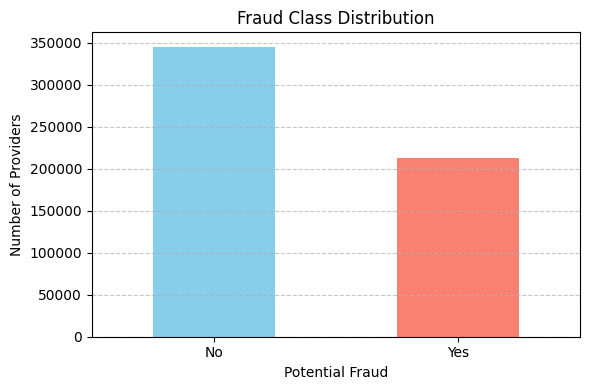

In [0]:
import matplotlib.pyplot as plt

# Check class distribution
fraud_counts = train_full['PotentialFraud'].value_counts()
fraud_percent = train_full['PotentialFraud'].value_counts(normalize=True) * 100

# Print raw counts and percentages
print("Fraud Class Counts:")
print(fraud_counts)
print("\nFraud Class Percentage:")
print(fraud_percent.round(2))

# Plot
plt.figure(figsize=(6, 4))
fraud_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Fraud Class Distribution")
plt.ylabel("Number of Providers")
plt.xlabel("Potential Fraud")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Step 2: Reimbursement Amounts per Claim and Provider

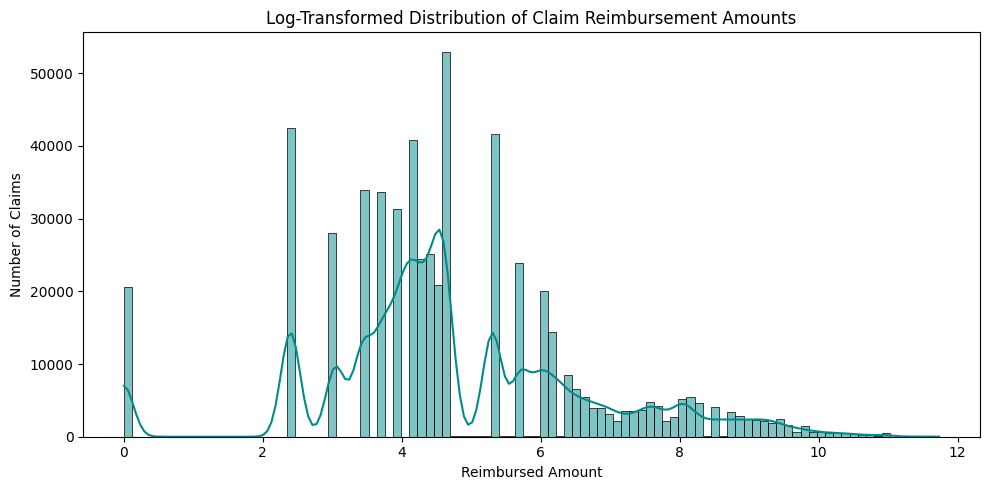

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Avoid log(0) by adding 1
train_full["LogReimbursed"] = np.log1p(train_full["InscClaimAmtReimbursed"])

plt.figure(figsize=(10, 5))
sns.histplot(
    data=train_full,
    x="LogReimbursed",
    bins=100,
    kde=True,
    color="darkcyan"
)
plt.title("Log-Transformed Distribution of Claim Reimbursement Amounts")
plt.xlabel("Reimbursed Amount")
plt.ylabel("Number of Claims")
plt.tight_layout()
plt.show()

Step 3 claim frequency per provider

/tmp/ipython-input-9-1103628630.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_claims, x='Provider', y='ClaimCount', palette='mako')


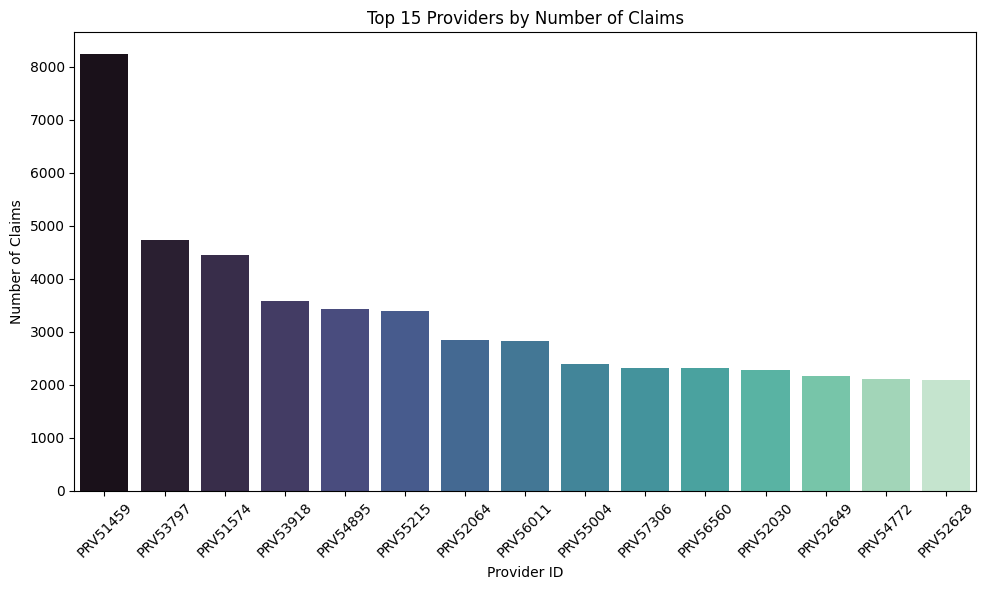

In [0]:
# Count number of claims per provider
claim_counts = train_full['Provider'].value_counts().reset_index()
claim_counts.columns = ['Provider', 'ClaimCount']

# Top 15 providers by claim count
top_claims = claim_counts.head(15)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_claims, x='Provider', y='ClaimCount', palette='mako')
plt.title('Top 15 Providers by Number of Claims')
plt.xticks(rotation=45)
plt.ylabel('Number of Claims')
plt.xlabel('Provider ID')
plt.tight_layout()
plt.show()

Step 4: Top 10 Most Frequent Diagnosis Codes


In [0]:
import pandas as pd

# Load ICD-9 mapping file using the correct delimiter and encoding
icd9_mapping = pd.read_csv("icd9.txt", delimiter='\t', encoding='ISO-8859-1')
# Drop the unnecessary 4th column
icd9_mapping = icd9_mapping.iloc[:, :3]

# Rename columns
icd9_mapping.columns = ["Code", "LongDescription", "ShortDescription"]

# Clean ICD-9 codes (remove decimal if any, trim whitespace)
icd9_mapping["Code"] = icd9_mapping["Code"].str.strip().str.replace(".", "", regex=False)

# Preview result
icd9_mapping.head(10)

,Code,LongDescription,ShortDescription
0,0010,Cholera due to vibrio cholerae,Cholera d/t vib cholerae
1,0011,Cholera due to vibrio cholerae el tor,Cholera d/t vib el tor
2,0019,"Cholera, unspecified",Cholera NOS
3,0020,Typhoid fever,Typhoid fever
4,0021,Paratyphoid fever A,Paratyphoid fever a
5,0022,Paratyphoid fever B,Paratyphoid fever b
6,0023,Paratyphoid fever C,Paratyphoid fever c
7,0029,"Paratyphoid fever, unspecified",Paratyphoid fever NOS
8,0030,Salmonella gastroenteritis,Salmonella enteritis
9,0031,Salmonella septicemia,Salmonella septicemia


Merge Top Diagnosis Codes with Descriptions

In [0]:
# Identify diagnosis code columns
diag_cols = [col for col in train_full.columns if col.startswith("ClmDiagnosisCode")]

# Melt into long format for easier mapping
diagnosis_long = train_full[diag_cols].copy()
diagnosis_long["RowID"] = diagnosis_long.index  # to keep track of rows
diagnosis_long = diagnosis_long.melt(id_vars="RowID", value_name="DiagCode").dropna()

# Merge with ICD-9 mapping
diagnosis_long = diagnosis_long.merge(icd9_mapping, left_on="DiagCode", right_on="Code", how="left")

# Optional: Fill missing descriptions with raw codes
diagnosis_long["Label"] = diagnosis_long["ShortDescription"].fillna(diagnosis_long["DiagCode"])

# Pivot back to wide format with descriptions
diagnosis_named = diagnosis_long.pivot(index="RowID", columns="variable", values="Label")

# Rename columns to distinguish them
diagnosis_named.columns = [col + "_Named" for col in diagnosis_named.columns]

# Join back to train_full
train_full = train_full.join(diagnosis_named)

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identify diagnosis code columns
diag_cols = ['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
             'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
             'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
             'ClmDiagnosisCode_10']

# Stack all codes into one long Series
all_diags = train_full[diag_cols].stack().dropna().astype(str)

# Count top 10 diagnosis codes
top_diags = all_diags.value_counts().head(10).reset_index()
top_diags.columns = ['DiagnosisCode', 'Count']

/tmp/ipython-input-13-382663291.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_diags, x='Label', y='Count', palette='viridis')


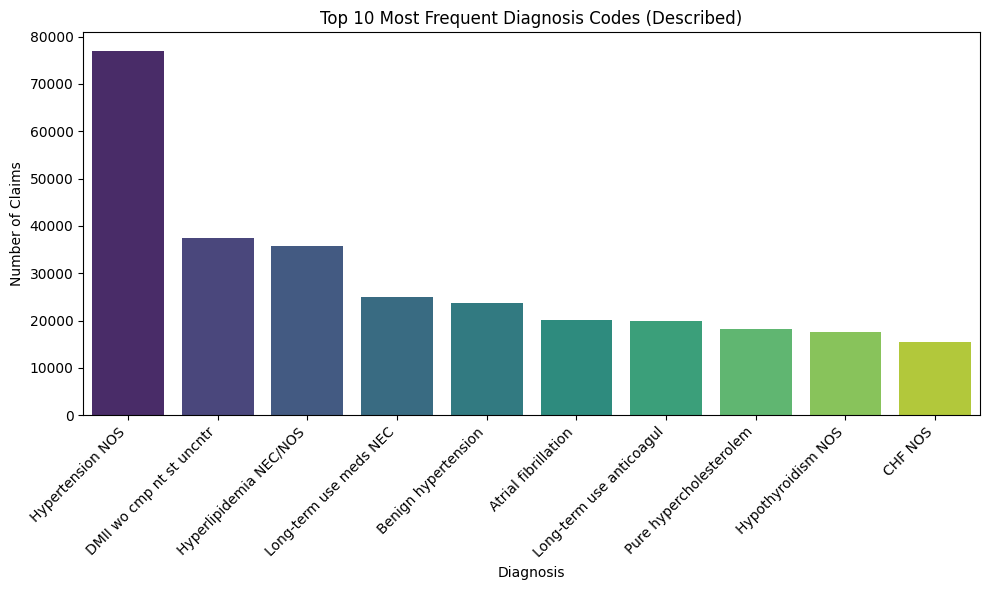

In [0]:
# Merge with ICD-9 descriptions
top_diags = top_diags.merge(icd9_mapping, left_on='DiagnosisCode', right_on='Code', how='left')

# Use short descriptions if available; fallback to code
top_diags['Label'] = top_diags['ShortDescription'].fillna(top_diags['DiagnosisCode'])

# Plot with descriptions
plt.figure(figsize=(10,6))
sns.barplot(data=top_diags, x='Label', y='Count', palette='viridis')
plt.title('Top 10 Most Frequent Diagnosis Codes (Described)')
plt.xlabel('Diagnosis')
plt.ylabel('Number of Claims')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Chronic Condition Averages by Fraud Label

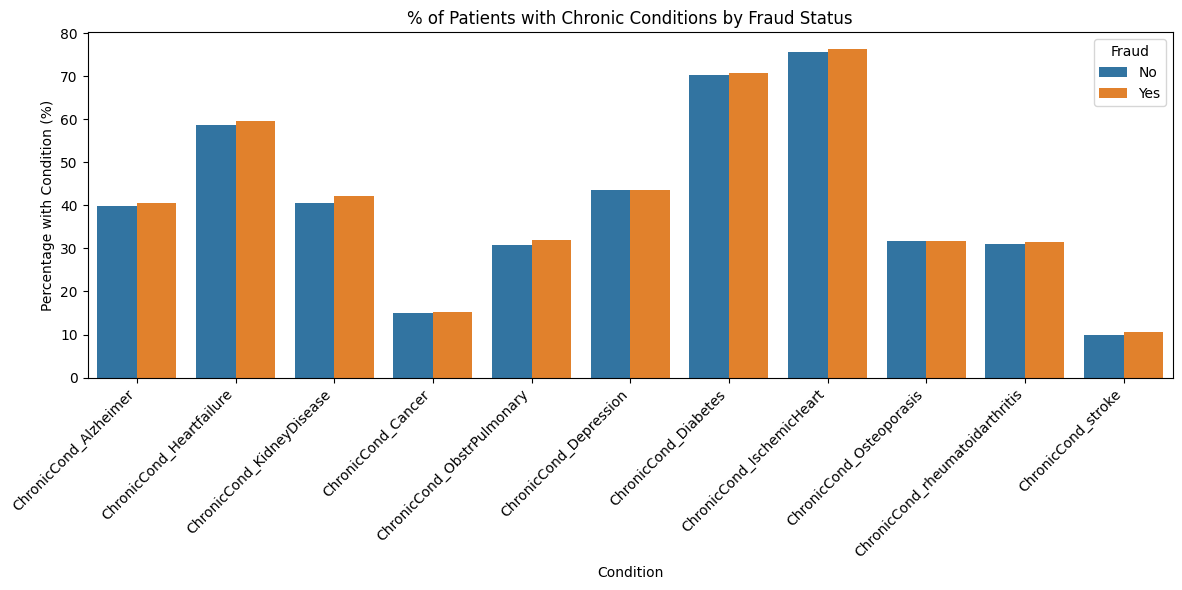

In [0]:
# List chronic condition columns
chronic_cols = [col for col in train_full.columns if col.startswith("ChronicCond_")]
# Convert 1/2 flags to binary: 1 → 1, 2 → 0
binary_chronic = train_full[chronic_cols].replace({1: 1, 2: 0})

# Add fraud flag back
binary_chronic['PotentialFraud'] = train_full['PotentialFraud']

# Group by fraud status and calculate % with condition (mean of binary 1s)
chronic_percent = binary_chronic.groupby('PotentialFraud').mean().T * 100
chronic_percent = chronic_percent.reset_index().melt(id_vars='index', var_name='Fraud', value_name='Percent')
chronic_percent.rename(columns={'index': 'Condition'}, inplace=True)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=chronic_percent, x='Condition', y='Percent', hue='Fraud')
plt.xticks(rotation=45, ha='right')
plt.title('% of Patients with Chronic Conditions by Fraud Status')
plt.ylabel('Percentage with Condition (%)')
plt.tight_layout()
plt.show()

In [0]:
# Show all columns in train_full that start with "ChronicCond_"
[ch for ch in train_full.columns if "ChronicCond_" in ch]

['ChronicCond_Alzheimer',
 'ChronicCond_Heartfailure',
 'ChronicCond_KidneyDisease',
 'ChronicCond_Cancer',
 'ChronicCond_ObstrPulmonary',
 'ChronicCond_Depression',
 'ChronicCond_Diabetes',
 'ChronicCond_IschemicHeart',
 'ChronicCond_Osteoporasis',
 'ChronicCond_rheumatoidarthritis',
 'ChronicCond_stroke']

% of Patients WITH Chronic Condition Seen by Fraud vs. Non-Fraud Providers

In [0]:
# List of chronic condition columns (already cleaned and used in your project)
chronic_cols = [
    'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
    'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
    'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
    'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke'
]

# Get the fraud label column
fraud = train_full['PotentialFraud']

# Create an empty list to collect stats
condition_stats = []

for col in chronic_cols:
    # Only look at rows where this condition is marked as 1 (present)
    has_condition = train_full[train_full[col] == 1]

    # Count how many are fraud vs. not fraud
    counts = has_condition['PotentialFraud'].value_counts()

    # Get percentages (normalize=True gives proportion)
    percentages = has_condition['PotentialFraud'].value_counts(normalize=True) * 100

    # Append to the results list
    condition_stats.append({
        "Condition": col.replace("ChronicCond_", ""),
        "Total Patients with Condition": len(has_condition),
        "Fraud Count": counts.get("Yes", 0),
        "No Fraud Count": counts.get("No", 0),
        "% Fraud": round(percentages.get("Yes", 0), 2),
        "% No Fraud": round(percentages.get("No", 0), 2)
    })

# Convert to DataFrame
import pandas as pd
cond_stats_df = pd.DataFrame(condition_stats)

# Display the table
cond_stats_df

,Condition,Total Patients with Condition,Fraud Count,No Fraud Count,% Fraud,% No Fraud
0,Alzheimer,224327,86347,137980,38.49,61.51
1,Heartfailure,329583,126846,202737,38.49,61.51
2,KidneyDisease,229984,89847,140137,39.07,60.93
3,Cancer,84505,32578,51927,38.55,61.45
4,ObstrPulmonary,174681,68108,106573,38.99,61.01
5,Depression,242714,92588,150126,38.15,61.85
6,Diabetes,393759,150765,242994,38.29,61.71
7,IschemicHeart,423830,162512,261318,38.34,61.66
8,Osteoporasis,177314,67743,109571,38.21,61.79
9,rheumatoidarthritis,173699,66843,106856,38.48,61.52


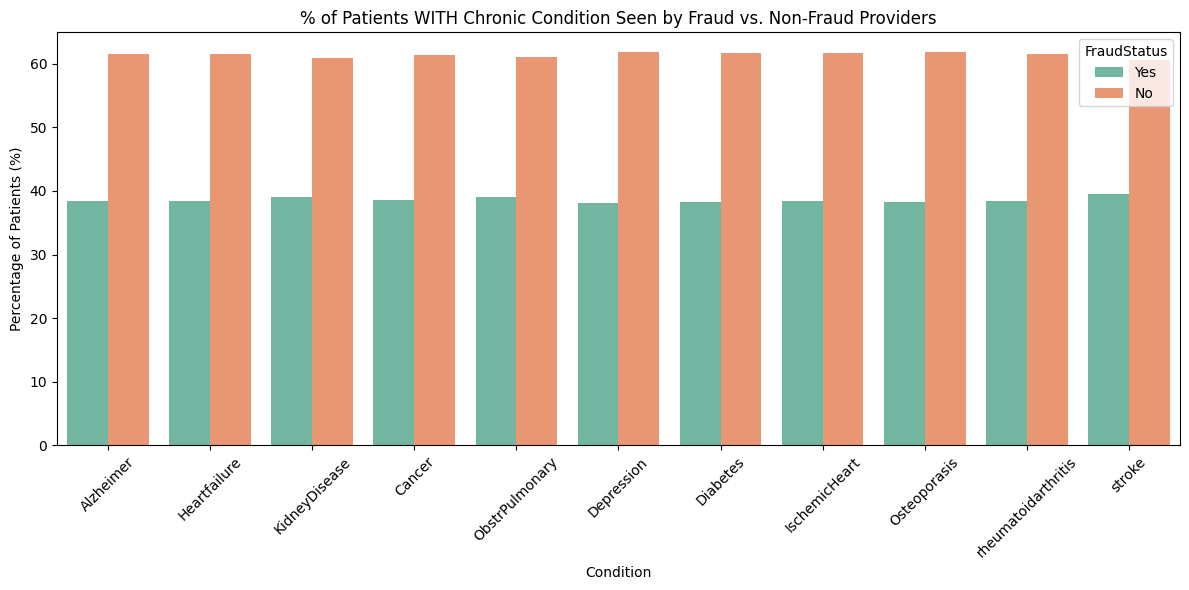

In [0]:
# Rebuild the results from scratch
rows = []

for col in chronic_cols:
    # Filter patients who have the condition (value == 1)
    condition_df = train_full[train_full[col] == 1]

    # Get total and fraud counts
    total = len(condition_df)
    fraud_counts = condition_df["PotentialFraud"].value_counts(normalize=True) * 100

    rows.append({
        'Condition': col.replace("ChronicCond_", ""),
        'Fraud_Yes_%': fraud_counts.get('Yes', 0),
        'Fraud_No_%': fraud_counts.get('No', 0),
        'N': total  # Optional: you can use this to label how many patients had the condition
    })

fraud_by_condition = pd.DataFrame(rows)

# Melt for plotting
fraud_by_condition_melted = pd.melt(
    fraud_by_condition,
    id_vars='Condition',
    value_vars=['Fraud_Yes_%', 'Fraud_No_%'],
    var_name='FraudStatus',
    value_name='Percentage'
)

fraud_by_condition_melted['FraudStatus'] = fraud_by_condition_melted['FraudStatus'].str.replace('Fraud_', '').str.replace('_%', '')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=fraud_by_condition_melted, x='Condition', y='Percentage', hue='FraudStatus', palette='Set2')
plt.title('% of Patients WITH Chronic Condition Seen by Fraud vs. Non-Fraud Providers')
plt.ylabel('Percentage of Patients (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Reimbursement Amounts – Fraud vs. Non-Fraud


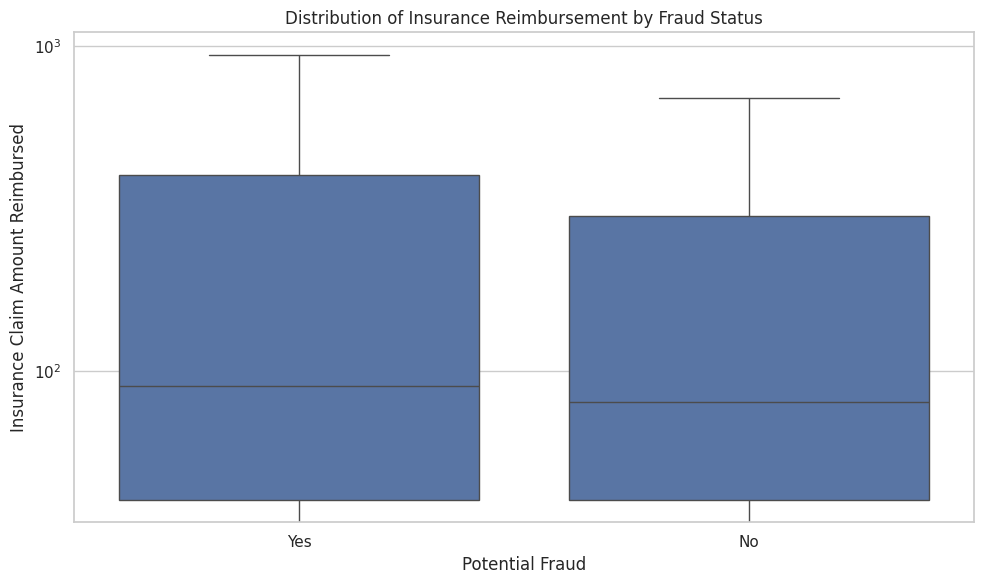

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# Plot distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_full, x='PotentialFraud', y='InscClaimAmtReimbursed', showfliers=False)
plt.title('Distribution of Insurance Reimbursement by Fraud Status')
plt.xlabel('Potential Fraud')
plt.ylabel('Insurance Claim Amount Reimbursed')
plt.yscale('log')  # optional: log scale to compress extreme values
plt.tight_layout()
plt.show()

In [0]:
# Summary stats by fraud status
summary_stats = train_full.groupby("PotentialFraud")["InscClaimAmtReimbursed"].describe()
summary_stats

,count,mean,std,min,25%,50%,75%,max
PotentialFraud,,,,,,,,
No,345415.0,755.213352,3056.460166,0.0,40.0,80.0,300.0,125000.0
Yes,212796.0,1389.505066,4785.074685,0.0,40.0,90.0,400.0,125000.0


Length of Stay by Fraud Status

,count,mean,std,min,25%,50%,75%,max
PotentialFraud,,,,,,,,
No,345415.0,1.617680,4.813118,0.0,0.0,0.0,0.0,35.0
Yes,212796.0,1.906916,5.045431,0.0,0.0,0.0,0.0,36.0


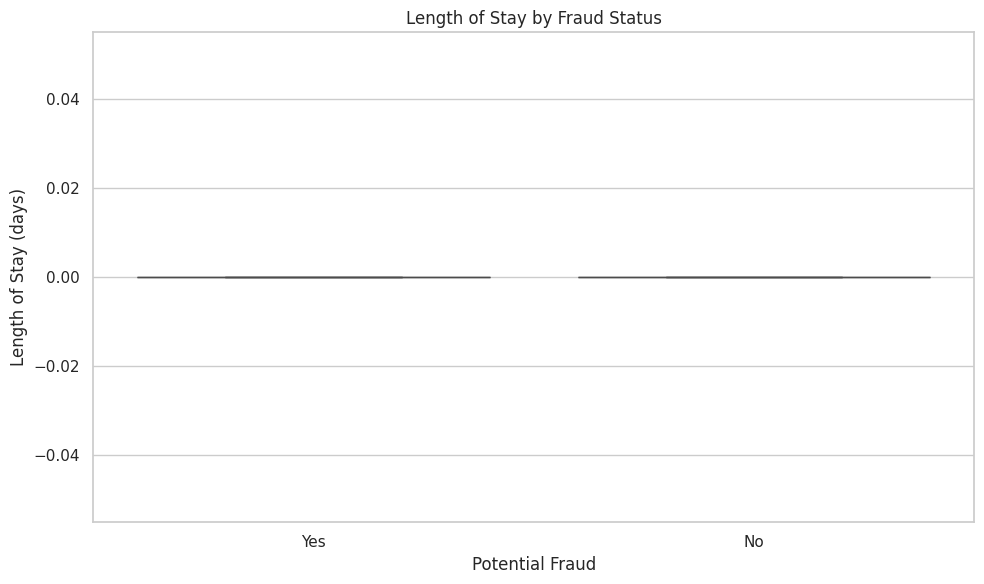

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure ClaimStartDt and ClaimEndDt are datetime
train_full['ClaimStartDt'] = pd.to_datetime(train_full['ClaimStartDt'])
train_full['ClaimEndDt'] = pd.to_datetime(train_full['ClaimEndDt'])

# Calculate Length of Stay
train_full['LengthOfStay'] = (train_full['ClaimEndDt'] - train_full['ClaimStartDt']).dt.days

# Remove invalid/negative stays
train_full = train_full[train_full['LengthOfStay'] >= 0]

# Summary stats
length_stats = train_full.groupby("PotentialFraud")["LengthOfStay"].describe()
display(length_stats)

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_full, x='PotentialFraud', y='LengthOfStay', showfliers=False)
plt.title('Length of Stay by Fraud Status')
plt.xlabel('Potential Fraud')
plt.ylabel('Length of Stay (days)')
plt.tight_layout()
plt.show()

Number of Unique Physicians per Provider

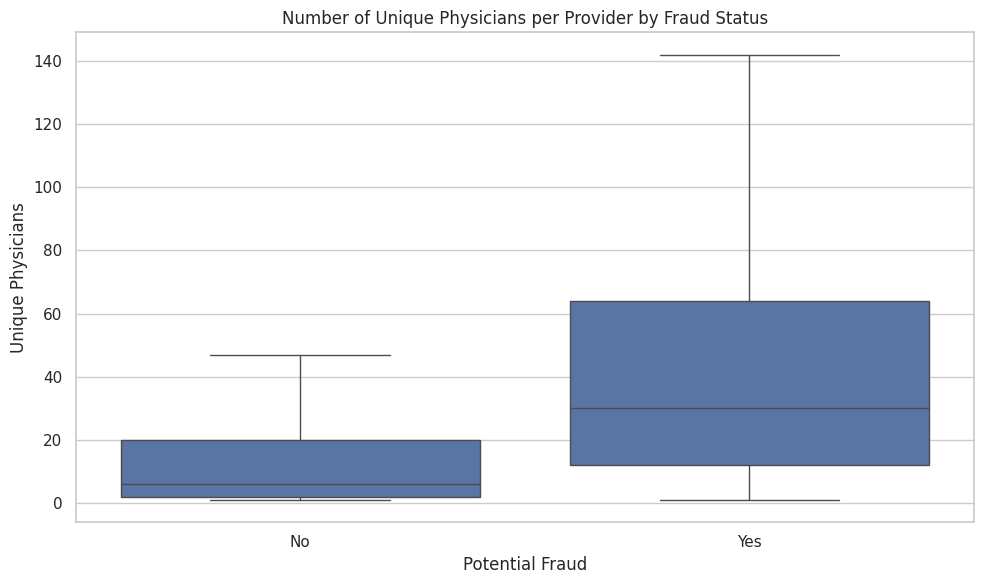

,count,mean,std,min,25%,50%,75%,max
PotentialFraud,,,,,,,,
No,4904.0,16.874388,28.200408,1.0,2.0,6.0,20.0,527.0
Yes,506.0,52.543478,71.983270,1.0,12.0,30.0,64.0,735.0


In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns
physician_cols = ['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']

# Stack and count unique physicians per Provider
provider_physicians = pd.concat([
    train_full[['Provider', col]].rename(columns={col: 'Physician'})
    for col in physician_cols
]).dropna().drop_duplicates()

# Count how many unique physicians each provider has
physician_counts = provider_physicians.groupby('Provider')['Physician'].nunique().reset_index()
physician_counts.columns = ['Provider', 'NumUniquePhysicians']

# Merge back to get fraud label
provider_fraud = train_full[['Provider', 'PotentialFraud']].drop_duplicates()
physician_counts = physician_counts.merge(provider_fraud, on='Provider', how='left')

# Plot
plt.figure(figsize=(10,6))
sns.boxplot(data=physician_counts, x='PotentialFraud', y='NumUniquePhysicians', showfliers=False)
plt.title('Number of Unique Physicians per Provider by Fraud Status')
plt.xlabel('Potential Fraud')
plt.ylabel('Unique Physicians')
plt.tight_layout()
plt.show()

# Summary table
physician_counts.groupby('PotentialFraud')['NumUniquePhysicians'].describe()

Claim Frequency per Beneficiary

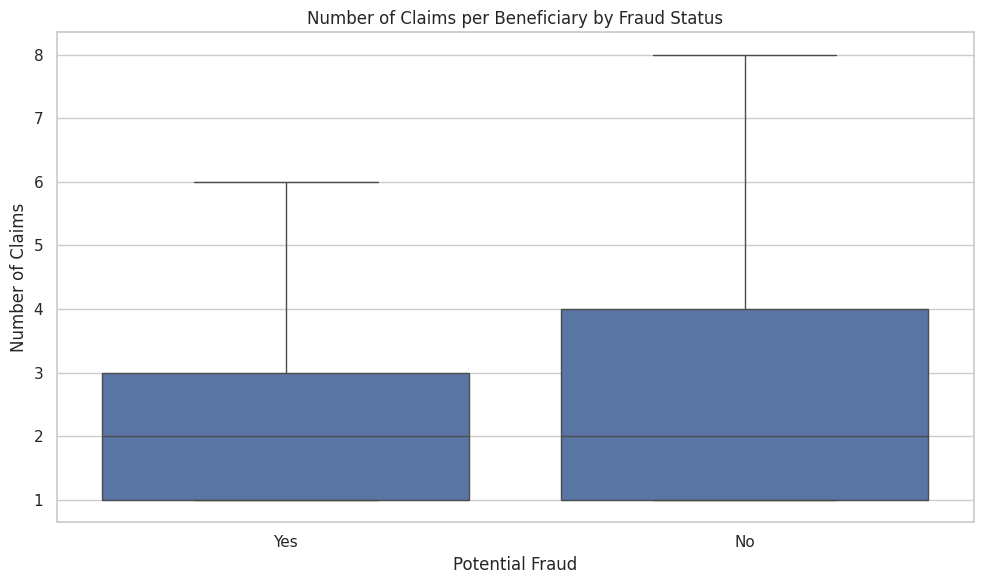

                   count      mean       std  min  25%  50%  75%   max
PotentialFraud                                                        
No              113627.0  3.039902  2.519875  1.0  1.0  2.0  4.0  29.0
Yes              83997.0  2.533376  2.228788  1.0  1.0  2.0  3.0  28.0


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Count number of claims per Beneficiary
claim_counts = train_full.groupby(['BeneID', 'PotentialFraud']).size().reset_index(name='ClaimCount')

# Step 2: Plot distribution of ClaimCount by Fraud status
plt.figure(figsize=(10,6))
sns.boxplot(data=claim_counts, x='PotentialFraud', y='ClaimCount', showfliers=False)
plt.title('Number of Claims per Beneficiary by Fraud Status')
plt.xlabel('Potential Fraud')
plt.ylabel('Number of Claims')
plt.tight_layout()
plt.show()

# Count number of claims per beneficiary
claims_per_beneficiary = train_full.groupby(['BeneID', 'PotentialFraud']).size().reset_index(name='ClaimCount')

# Group by fraud status and describe
claim_stats = claims_per_beneficiary.groupby('PotentialFraud')['ClaimCount'].describe()
print(claim_stats)

In [0]:
print(train_full.columns.tolist())

['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6', 'Source', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease', 'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression', 'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoida

Claim Overlap or Frequency

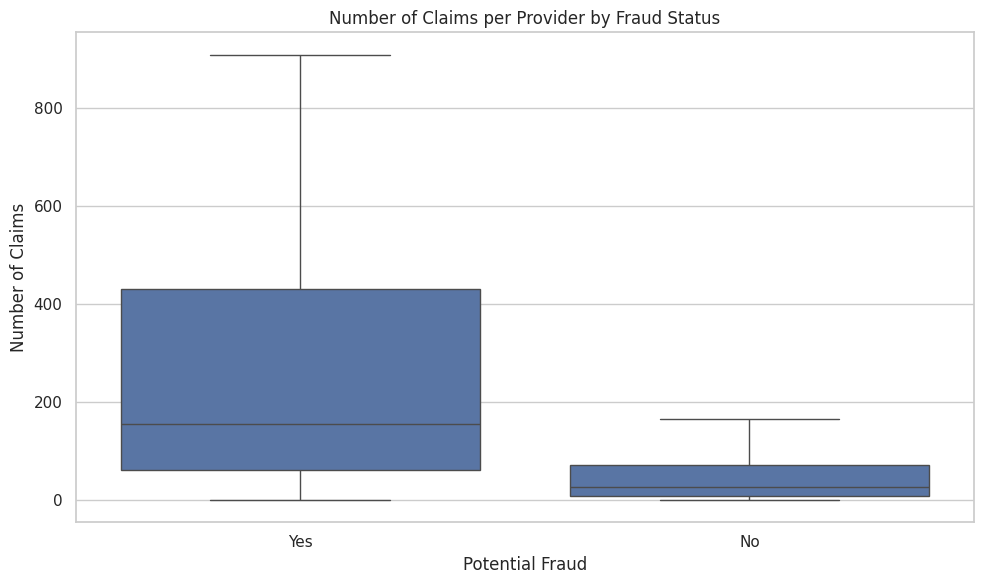

,count,mean,std,min,25%,50%,75%,max
PotentialFraud,,,,,,,,
No,4904.0,70.435359,128.942510,1.0,9.0,27.0,72.0,1245.0
Yes,506.0,420.545455,722.734485,1.0,62.0,155.5,432.0,8240.0


In [0]:
# Count claims per provider
claims_per_provider = train_full['Provider'].value_counts().reset_index()
claims_per_provider.columns = ['Provider', 'NumClaims']

# Merge with fraud status
provider_fraud = train_full[['Provider', 'PotentialFraud']].drop_duplicates()
claims_per_provider = claims_per_provider.merge(provider_fraud, on='Provider', how='left')

# Boxplot to compare
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=claims_per_provider, x='PotentialFraud', y='NumClaims', showfliers=False)
plt.title('Number of Claims per Provider by Fraud Status')
plt.xlabel('Potential Fraud')
plt.ylabel('Number of Claims')
plt.tight_layout()
plt.show()

# Summarize claims per provider by fraud status
claims_per_provider_stats = claims_per_provider.groupby('PotentialFraud')['NumClaims'].describe()
claims_per_provider_stats

Patients Visiting Multiple Providers

If a patient (BeneID) appears across many providers, it could suggest suspicious provider-sharing.

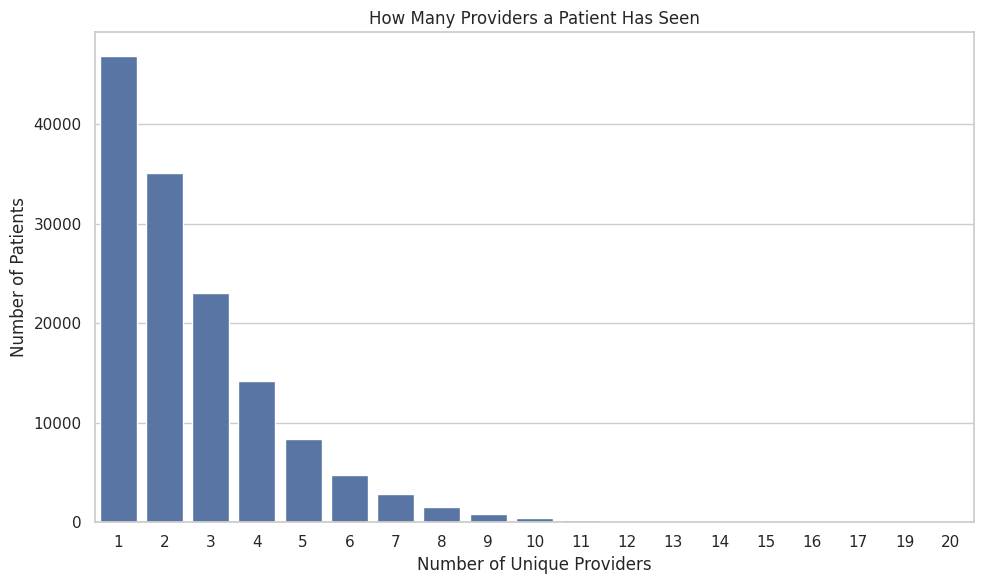

,count,mean,std,min,25%,50%,75%,max
PotentialFraud,,,,,,,,
No,82552.0,2.600918,1.802629,1.0,1.0,2.0,3.0,16.0
Yes,56004.0,2.653185,1.886948,1.0,1.0,2.0,3.0,20.0


In [0]:
# Count unique providers per patient
bene_provider_counts = train_full.groupby('BeneID')['Provider'].nunique().value_counts().reset_index()
bene_provider_counts.columns = ['NumProvidersSeen', 'NumPatients']
bene_provider_counts = bene_provider_counts.sort_values('NumProvidersSeen')

# Plot distribution
plt.figure(figsize=(10, 6))
sns.barplot(data=bene_provider_counts, x='NumProvidersSeen', y='NumPatients')
plt.title('How Many Providers a Patient Has Seen')
plt.xlabel('Number of Unique Providers')
plt.ylabel('Number of Patients')
plt.tight_layout()
plt.show()

# Count number of unique providers per beneficiary
providers_per_patient = train_full.groupby('BeneID')['Provider'].nunique().reset_index(name='ProviderCount')

# Merge with fraud labels (via Provider)
patient_fraud_status = train_full[['BeneID', 'Provider', 'PotentialFraud']].drop_duplicates()
providers_per_patient = providers_per_patient.merge(patient_fraud_status, on='BeneID', how='left')

# Keep only one fraud label per patient — based on most frequent (or take first)
providers_per_patient = providers_per_patient.drop_duplicates(subset='BeneID')

# Summary stats
summary = providers_per_patient.groupby('PotentialFraud')['ProviderCount'].describe()
summary

In [0]:
# Count unique providers per patient
patient_provider_counts = train_full.groupby('BeneID')['Provider'].nunique()

# Filter patients with more than, say, 10 providers
suspicious_patients = patient_provider_counts[patient_provider_counts > 10].sort_values(ascending=False)
suspicious_patients_df = suspicious_patients.reset_index().rename(columns={'Provider': 'NumProviders'})

# Get only those patients' claims
suspicious_claims = train_full[train_full['BeneID'].isin(suspicious_patients.index)]

# Group by patient and check how many of their claims are with fraudulent providers
fraud_by_patient = suspicious_claims.groupby('BeneID')['PotentialFraud'].value_counts(normalize=True).unstack(fill_value=0)
fraud_by_patient.columns = ['% No Fraud', '% Fraud']
fraud_by_patient = fraud_by_patient.reset_index()

# Merge with provider count
result_df = suspicious_patients_df.merge(fraud_by_patient, on='BeneID', how='left')

# Sort by highest provider count
result_df = result_df.sort_values('NumProviders', ascending=False)
result_df.head(10)  # Show the top 10 suspicious patients

,BeneID,NumProviders,% No Fraud,% Fraud
0,BENE40202,20,0.666667,0.333333
1,BENE122118,19,0.846154,0.153846
4,BENE133498,17,0.600000,0.400000
2,BENE122143,17,0.777778,0.222222
3,BENE120090,17,0.727273,0.272727
12,BENE25386,16,0.812500,0.187500
10,BENE140999,16,0.722222,0.277778
9,BENE153509,16,0.812500,0.187500
5,BENE107120,16,0.705882,0.294118
7,BENE118823,16,0.863636,0.136364


In [0]:
# Step 1: Count number of unique providers seen by each patient
provider_counts = train_full.groupby('BeneID')['Provider'].nunique().reset_index()
provider_counts.columns = ['BeneID', 'NumProviders']

# Step 2: Filter to patients who saw 15 or more providers
high_provider_patients = provider_counts[provider_counts['NumProviders'] >= 15].copy()
bene_ids = high_provider_patients['BeneID'].tolist()

# Step 3: List of chronic condition columns
chronic_cols = [col for col in train_full.columns if col.startswith("ChronicCond_")]

# Step 4: Subset original data for these patients
subset = train_full[train_full['BeneID'].isin(bene_ids)].copy()

# Step 5: Compute chronic condition counts per claim
subset['ChronicCount'] = subset[chronic_cols].eq(1).sum(axis=1)

# Step 6: Group and summarize
summary_df = subset.groupby('BeneID').agg(
    NumClaims=('ClaimID', 'nunique'),
    NumProviders=('Provider', 'nunique'),
    AvgChronicConditions=('ChronicCount', 'mean'),
    PercentFraud=('PotentialFraud', lambda x: (x == 'Yes').mean() * 100)
).reset_index()

# Step 7: Sort by fraud percentage
summary_df = summary_df.sort_values(by='PercentFraud', ascending=False)

# Show the results
summary_df.head(10)

,BeneID,NumClaims,NumProviders,AvgChronicConditions,PercentFraud
1,BENE109091,21,15,9.0,57.142857
15,BENE145288,21,15,6.0,57.142857
26,BENE64791,20,15,9.0,45.000000
3,BENE111377,20,15,8.0,40.000000
11,BENE133498,20,17,6.0,40.000000
9,BENE122820,22,15,7.0,36.363636
14,BENE142566,21,15,9.0,33.333333
24,BENE40202,27,20,8.0,33.333333
29,BENE94509,18,15,8.0,33.333333
25,BENE52332,20,15,4.0,30.000000


Annual Reimbursement & Deductibles

Patient Demographics vs. *Fraud*

Age Distribution by Fraud Status

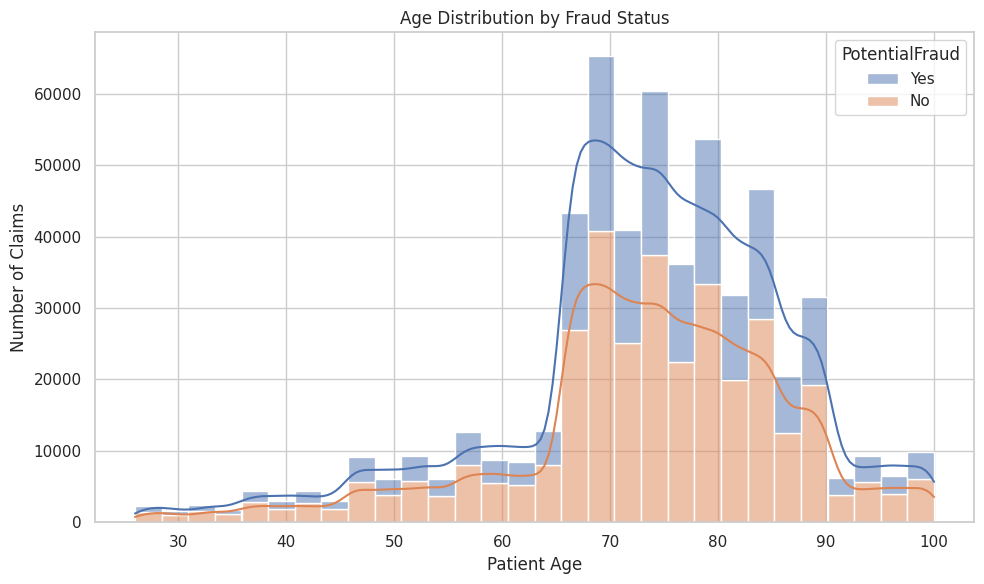

                   count       mean        std   min   25%   50%   75%    max
PotentialFraud                                                               
No              345415.0  73.192968  13.018338  26.0  67.0  74.0  82.0  100.0
Yes             212796.0  73.412931  12.999957  26.0  68.0  74.0  82.0  100.0
PotentialFraud      No    Yes   Total  % Fraud
AgeGroup                                      
0–20                 0      0       0      NaN
21–30             1964   1168    3132    37.29
31–40             6644   3945   10589    37.26
41–50            13124   8013   21137    37.91
51–60            22258  13101   35359    37.05
61–70            69965  42463  112428    37.77
71–80           120551  74310  194861    38.13
81+             108779  68502  177281    38.64


/tmp/ipython-input-28-3606485772.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = train_full.groupby(['AgeGroup', 'PotentialFraud']).size().unstack(fill_value=0)


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert DOB to datetime (if not already)
train_full['DOB'] = pd.to_datetime(train_full['DOB'], errors='coerce')

# Estimate age (assume claim year ~ 2009 for example)
claim_year = 2009
train_full['Age'] = claim_year - train_full['DOB'].dt.year

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(data=train_full, x='Age', hue='PotentialFraud', bins=30, kde=True, multiple='stack')
plt.title('Age Distribution by Fraud Status')
plt.xlabel('Patient Age')
plt.ylabel('Number of Claims')
plt.tight_layout()
plt.show()
# Group and describe age
age_stats = train_full.groupby('PotentialFraud')['Age'].describe()
print(age_stats)

# Define age bins
bins = [0, 20, 30, 40, 50, 60, 70, 80, 100]
labels = ['0–20', '21–30', '31–40', '41–50', '51–60', '61–70', '71–80', '81+']
train_full['AgeGroup'] = pd.cut(train_full['Age'], bins=bins, labels=labels, right=False)

# Count by age group and fraud
age_group_counts = train_full.groupby(['AgeGroup', 'PotentialFraud']).size().unstack(fill_value=0)
age_group_counts['Total'] = age_group_counts.sum(axis=1)
age_group_counts['% Fraud'] = (age_group_counts['Yes'] / age_group_counts['Total'] * 100).round(2)
print(age_group_counts)

Gender vs. Fraud

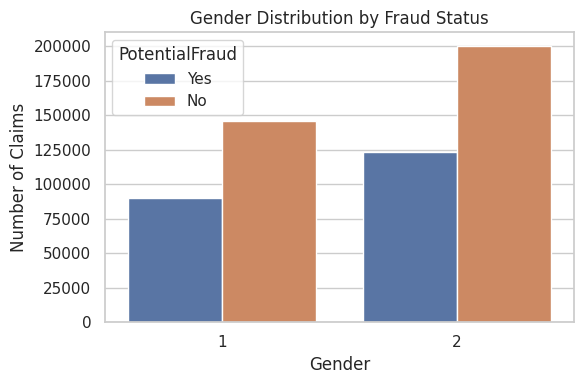

PotentialFraud,No,Yes,Total,% Fraud
Gender,,,,
1,145414,89683,235097,38.15
2,200001,123113,323114,38.10


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=train_full, x='Gender', hue='PotentialFraud')
plt.title('Gender Distribution by Fraud Status')
plt.xlabel('Gender')
plt.ylabel('Number of Claims')
plt.tight_layout()
plt.show()

gender_counts = train_full.groupby(['Gender', 'PotentialFraud']).size().unstack(fill_value=0)
gender_counts['Total'] = gender_counts.sum(axis=1)
gender_counts['% Fraud'] = (gender_counts['Yes'] / gender_counts['Total'] * 100).round(2)
gender_counts

Race vs. Fraud

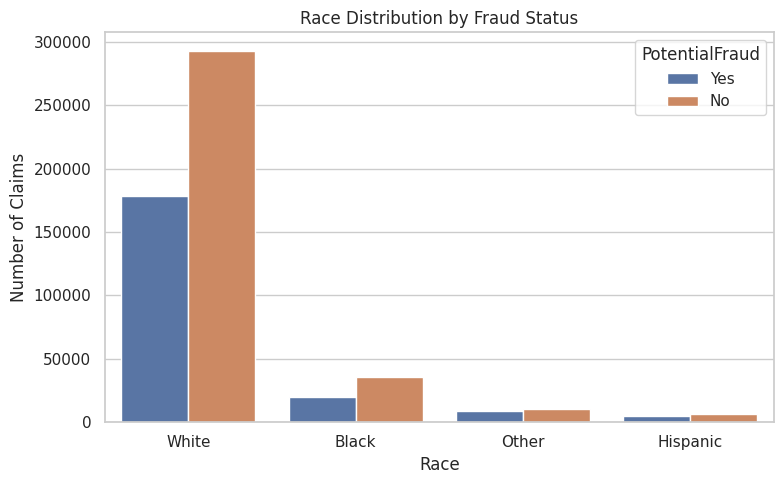

PotentialFraud,No,Yes,Total,% Fraud
Race,,,,
Black,35356,20284,55640,36.46
Hispanic,6615,5205,11820,44.04
Other,10753,8962,19715,45.46
White,292691,178345,471036,37.86


In [0]:
# Clean start
train_full = train_full.drop(columns=['Race'], errors='ignore')

# Ensure BeneID is string (to avoid join issues)
train_full['BeneID'] = train_full['BeneID'].astype(str)
train_beneficiary['BeneID'] = train_beneficiary['BeneID'].astype(str)

# Merge Race back in
train_full = train_full.merge(train_beneficiary[['BeneID', 'Race']], on='BeneID', how='left')

# Map Race codes to readable labels
race_mapping = {
    1: 'White',
    2: 'Black',
    3: 'Other',
    5: 'Hispanic',
    0: 'Unknown'
}
train_full['Race'] = train_full['Race'].map(race_mapping)

plt.figure(figsize=(8, 5))
sns.countplot(data=train_full, x='Race', hue='PotentialFraud')
plt.title('Race Distribution by Fraud Status')
plt.xlabel('Race')
plt.ylabel('Number of Claims')
plt.tight_layout()
plt.show()

race_counts = train_full.groupby(['Race', 'PotentialFraud']).size().unstack(fill_value=0)
race_counts['Total'] = race_counts.sum(axis=1)
race_counts['% Fraud'] = (race_counts['Yes'] / race_counts['Total'] * 100).round(2)
race_counts

Geography vs. Fraud.

In [0]:
# FIPS to state name mapping
fips_to_state = {
    1: 'Alabama', 2: 'Alaska', 4: 'Arizona', 5: 'Arkansas', 6: 'California',
    8: 'Colorado', 9: 'Connecticut', 10: 'Delaware', 11: 'DC', 12: 'Florida',
    13: 'Georgia', 15: 'Hawaii', 16: 'Idaho', 17: 'Illinois', 18: 'Indiana',
    19: 'Iowa', 20: 'Kansas', 21: 'Kentucky', 22: 'Louisiana', 23: 'Maine',
    24: 'Maryland', 25: 'Massachusetts', 26: 'Michigan', 27: 'Minnesota',
    28: 'Mississippi', 29: 'Missouri', 30: 'Montana', 31: 'Nebraska',
    32: 'Nevada', 33: 'New Hampshire', 34: 'New Jersey', 35: 'New Mexico',
    36: 'New York', 37: 'North Carolina', 38: 'North Dakota', 39: 'Ohio',
    40: 'Oklahoma', 41: 'Oregon', 42: 'Pennsylvania', 44: 'Rhode Island',
    45: 'South Carolina', 46: 'South Dakota', 47: 'Tennessee', 48: 'Texas',
    49: 'Utah', 50: 'Vermont', 51: 'Virginia', 53: 'Washington', 54: 'West Virginia',
    55: 'Wisconsin', 56: 'Wyoming'
}

# Group by State and Fraud
state_fraud_counts = train_full.groupby(['State', 'PotentialFraud']).size().unstack(fill_value=0)

# Compute totals and fraud %
state_fraud_counts['Total'] = state_fraud_counts['Yes'] + state_fraud_counts['No']
state_fraud_counts['% Fraud'] = (state_fraud_counts['Yes'] / state_fraud_counts['Total'] * 100).round(2)

# Replace FIPS with names
state_fraud_counts['StateName'] = state_fraud_counts.index.map(fips_to_state)

# Move StateName to index
state_fraud_counts = state_fraud_counts.set_index('StateName')

# Sort and show top 10
state_fraud_counts = state_fraud_counts.sort_values('% Fraud', ascending=False)
state_fraud_counts.head(10)

PotentialFraud,No,Yes,Total,% Fraud
StateName,,,,
South Dakota,1257,2124,3381,62.82
Arkansas,21015,30335,51350,59.07
Utah,6384,8613,14997,57.43
Louisiana,5826,7798,13624,57.24
Nebraska,6828,9112,15940,57.16
California,3534,3666,7200,50.92
Nevada,1717,1739,3456,50.32
New Hampshire,17532,17492,35024,49.94
Ohio,12803,11448,24251,47.21


Bar Plot of Fraud Rate by State (Top 15 States)

/tmp/ipython-input-32-3926899593.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_15, x='StateName', y='% Fraud', palette='flare')


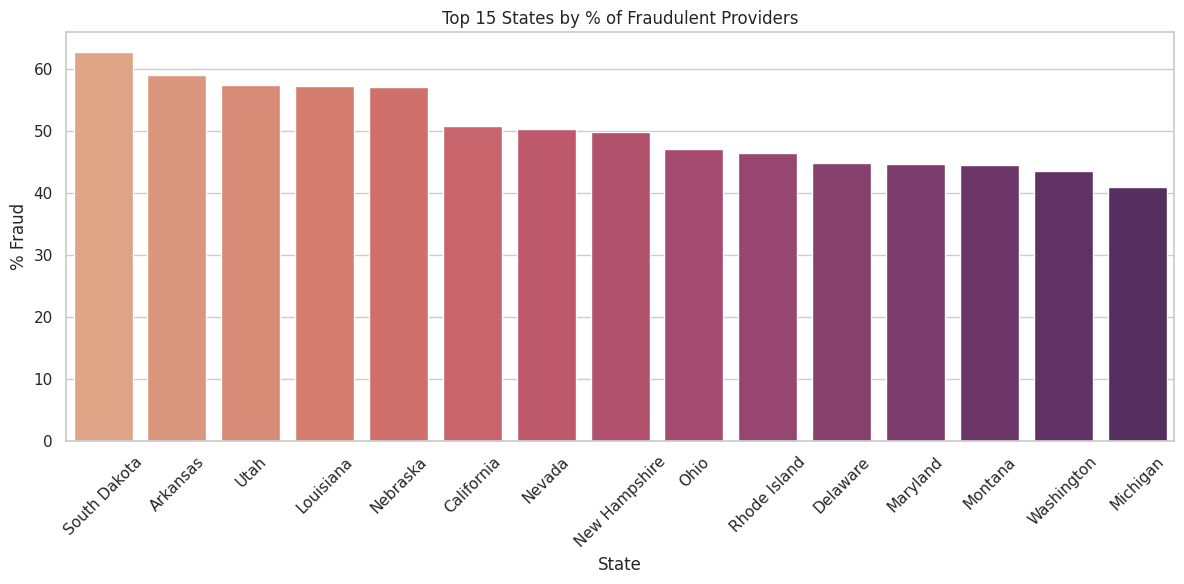

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reset index so StateName becomes a column for plotting
plot_df = state_fraud_counts.reset_index()

# Sort top 15 by % Fraud
top_15 = plot_df.sort_values('% Fraud', ascending=False).head(15)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_15, x='StateName', y='% Fraud', palette='flare')
plt.title('Top 15 States by % of Fraudulent Providers')
plt.xlabel('State')
plt.ylabel('% Fraud')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Duplicate Claims

In [0]:
duplicate_claims = train_full.duplicated(subset=['ClaimID'])
print(f"Total duplicate ClaimIDs: {duplicate_claims.sum()}")

Total duplicate ClaimIDs: 0


Duplicate Claims by Key Fields


In [0]:
claim_duplicates = train_full.duplicated(
    subset=['BeneID', 'Provider', 'ClaimStartDt', 'ClaimEndDt', 'InscClaimAmtReimbursed']
)
print(f"Suspicious duplicate claims: {claim_duplicates.sum()}")

Suspicious duplicate claims: 81


In [0]:
# Step 1: Identify suspicious duplicate claims (same BeneID, Provider, ClaimStartDt, ClaimEndDt, InscClaimAmtReimbursed)
dup_claims = train_full[
    train_full.duplicated(
        subset=['BeneID', 'Provider', 'ClaimStartDt', 'ClaimEndDt', 'InscClaimAmtReimbursed'],
        keep=False
    )
]

# Step 2: Check fraud distribution among those duplicates
fraud_counts = dup_claims['PotentialFraud'].value_counts()
print("Fraud distribution among suspicious duplicate claims:")
print(fraud_counts)

# Optional: Percent breakdown
fraud_pct = (fraud_counts / len(dup_claims) * 100).round(2)
print("\nPercentage breakdown:")
print(fraud_pct)

Fraud distribution among suspicious duplicate claims:
PotentialFraud
Yes    82
No     80
Name: count, dtype: int64

Percentage breakdown:
PotentialFraud
Yes    50.62
No     49.38
Name: count, dtype: float64


Providers submitting multiple claims with same diagnosis & procedure

In [0]:
duplicate_diag_proc = train_full.duplicated(
    subset=['Provider', 'ClmDiagnosisCode_1', 'ClmProcedureCode_1']
)
print(f"Providers with same diagnosis & procedure codes: {duplicate_diag_proc.sum()}")

Providers with same diagnosis & procedure codes: 109386


Patients treated by many different providers

In [0]:
patients_per_provider = train_full.groupby('BeneID')['Provider'].nunique()
print(f"Max providers a patient has seen: {patients_per_provider.max()}")

Max providers a patient has seen: 20


 Claims with overlapping dates for the same patient

In [0]:
overlap_df = train_full[['BeneID', 'ClaimStartDt', 'ClaimEndDt']].copy()
overlap_df['ClaimStartDt'] = pd.to_datetime(overlap_df['ClaimStartDt'])
overlap_df['ClaimEndDt'] = pd.to_datetime(overlap_df['ClaimEndDt'])

# Sort and shift to detect overlap
overlap_df = overlap_df.sort_values(by=['BeneID', 'ClaimStartDt'])
overlap_df['PrevEndDt'] = overlap_df.groupby('BeneID')['ClaimEndDt'].shift(1)
overlap_df['Overlap'] = overlap_df['ClaimStartDt'] <= overlap_df['PrevEndDt']
overlap_count = overlap_df['Overlap'].sum()

print(f"Overlapping claims for same patient: {overlap_count}")

Overlapping claims for same patient: 19726


Step 1: Finalize the Modeling Dataset

In [0]:
# Non-predictive columns to drop
non_predictive = [
    'BeneID', 'ClaimID', 'Provider', 'AttendingPhysician',
    'OperatingPhysician', 'OtherPhysician', 'AdmissionDt', 'DischargeDt',
    'ClaimStartDt', 'ClaimEndDt', 'DOB', 'DOD', 'PotentialFraud'
]
# Recreate the binary fraud target column
train_full['FraudLabel'] = train_full['PotentialFraud'].map({'Yes': 1, 'No': 0})

In [0]:
# Drop procedure code columns
cols_to_drop = [
    'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
    'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6'
]

train_model = train_full.drop(columns=non_predictive + cols_to_drop, errors='ignore')

# Remove remaining object columns (except FraudLabel)
train_model = train_model.drop(columns=[col for col in train_model.columns if train_model[col].dtype == 'object' and col != 'FraudLabel'])

# Drop remaining rows with any NaNs
train_model = train_model.dropna()

# Verify result
print("Final modeling dataset is ready:")
print("Features shape:", train_model.drop(columns=['FraudLabel']).shape)
print("Target shape:", train_model['FraudLabel'].shape)
print("Class balance:")
print(train_model['FraudLabel'].value_counts(normalize=True).rename({0: 'No', 1: 'Yes'}).round(4))

Final modeling dataset is ready:
Features shape: (553898, 26)
Target shape: (553898,)
Class balance:
FraudLabel
No     0.6191
Yes    0.3809
Name: proportion, dtype: float64


Step 2: Train-Test Split

In [0]:
from sklearn.model_selection import train_test_split

# Split data
X = train_model.drop(columns=['FraudLabel'])
y = train_model['FraudLabel']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Check balance
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("\nTraining class balance:")
print(y_train.value_counts(normalize=True).rename({0: 'No', 1: 'Yes'}).round(4))
print("\nValidation class balance:")
print(y_val.value_counts(normalize=True).rename({0: 'No', 1: 'Yes'}).round(4))

Training set shape: (443118, 26)
Validation set shape: (110780, 26)

Training class balance:
FraudLabel
No     0.6191
Yes    0.3809
Name: proportion, dtype: float64

Validation class balance:
FraudLabel
No     0.6191
Yes    0.3809
Name: proportion, dtype: float64


Step 3: Baseline Model — Logistic Regression


In [0]:
# Map age groups to numeric values (midpoint of the range)
agegroup_map = {
    '0–20': 10,
    '21–30': 25,
    '31–40': 35,
    '41–50': 45,
    '51–60': 55,
    '61–70': 65,
    '71–80': 75,
    '81+': 85
}

# Apply mapping
X_train['AgeGroup'] = X_train['AgeGroup'].map(agegroup_map)
X_val['AgeGroup'] = X_val['AgeGroup'].map(agegroup_map)

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize and train model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Predict
y_pred = logreg.predict(X_val)
y_proba = logreg.predict_proba(X_val)[:, 1]

# Evaluation
print("Classification Report:")
print(classification_report(y_val, y_pred, target_names=["No Fraud", "Fraud"]))

print("\n Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

auc = roc_auc_score(y_val, y_proba)
print(f"\n AUC-ROC Score: {auc:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

    No Fraud       0.63      0.95      0.76     68580
       Fraud       0.57      0.11      0.18     42200

    accuracy                           0.63    110780
   macro avg       0.60      0.53      0.47    110780
weighted avg       0.61      0.63      0.54    110780


 Confusion Matrix:
[[65175  3405]
 [37687  4513]]

 AUC-ROC Score: 0.5539


Step 4. Improved Model (XGBoost)

In [0]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import pandas as pd

# Step 1: One-hot encode categorical variable(s) (e.g., AgeGroup)
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_val_encoded = pd.get_dummies(X_val, drop_first=True)

# Align columns in case some dummy columns are missing in one set
X_val_encoded = X_val_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Step 2: Initialize and train the XGBoost model
xgb = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb.fit(X_train_encoded, y_train)

# Step 3: Predict
y_pred_xgb = xgb.predict(X_val_encoded)
y_proba_xgb = xgb.predict_proba(X_val_encoded)[:, 1]

# Step 4: Evaluation
print("Classification Report (XGBoost):")
print(classification_report(y_val, y_pred_xgb))

print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred_xgb))

auc_xgb = roc_auc_score(y_val, y_proba_xgb)
print(f"\nAUC-ROC Score: {auc_xgb:.4f}")




/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:54:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.76      0.87      0.81     68580
           1       0.72      0.56      0.63     42200

    accuracy                           0.75    110780
   macro avg       0.74      0.71      0.72    110780
weighted avg       0.75      0.75      0.74    110780


Confusion Matrix:
[[59597  8983]
 [18568 23632]]

AUC-ROC Score: 0.8024


Step 5. Cross-Validation

In [0]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# Step 0: Ensure categorical columns are converted to numeric via one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Reset your arrays
accuracies = []
precisions = []
recalls = []
f1s = []
aucs = []

# Cross-validation setup
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation loop
for train_idx, val_idx in kf.split(X_encoded, y):
    X_fold_train, X_fold_val = X_encoded.iloc[train_idx], X_encoded.iloc[val_idx]
    y_fold_train, y_fold_val = y.iloc[train_idx], y.iloc[val_idx]

    # Model
    model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
    model.fit(X_fold_train, y_fold_train)

    # Predict
    preds = model.predict(X_fold_val)
    probs = model.predict_proba(X_fold_val)[:, 1]

    # Metrics
    accuracies.append(accuracy_score(y_fold_val, preds))
    precisions.append(precision_score(y_fold_val, preds))
    recalls.append(recall_score(y_fold_val, preds))
    f1s.append(f1_score(y_fold_val, preds))
    aucs.append(roc_auc_score(y_fold_val, probs))

# Summary
print("Cross-Validation Results (5-fold):")
print(f"Accuracy:  {np.mean(accuracies):.4f}")
print(f"Precision: {np.mean(precisions):.4f}")
print(f"Recall:    {np.mean(recalls):.4f}")
print(f"F1 Score:  {np.mean(f1s):.4f}")
print(f"AUC-ROC:   {np.mean(aucs):.4f}")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:58:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:59:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:59:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:59:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:59:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Cross-Validation Results (5-fold):
Accuracy:  0.7659
Precision: 0.7371
Recall:    0.5991
F1 Score:  0.6609
AUC-ROC:   0.8222


Step 6. SHAP / Feature Explanation

In [0]:
# If AgeGroup is like: ['61–70', '71–80', etc.]
age_mapping = {
    '0–20': 0,
    '21–30': 1,
    '31–40': 2,
    '41–50': 3,
    '51–60': 4,
    '61–70': 5,
    '71–80': 6,
    '81+': 7
}

X_train['AgeGroup'] = X_train['AgeGroup'].map(age_mapping)
X_val['AgeGroup'] = X_val['AgeGroup'].map(age_mapping)

In [0]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:59:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

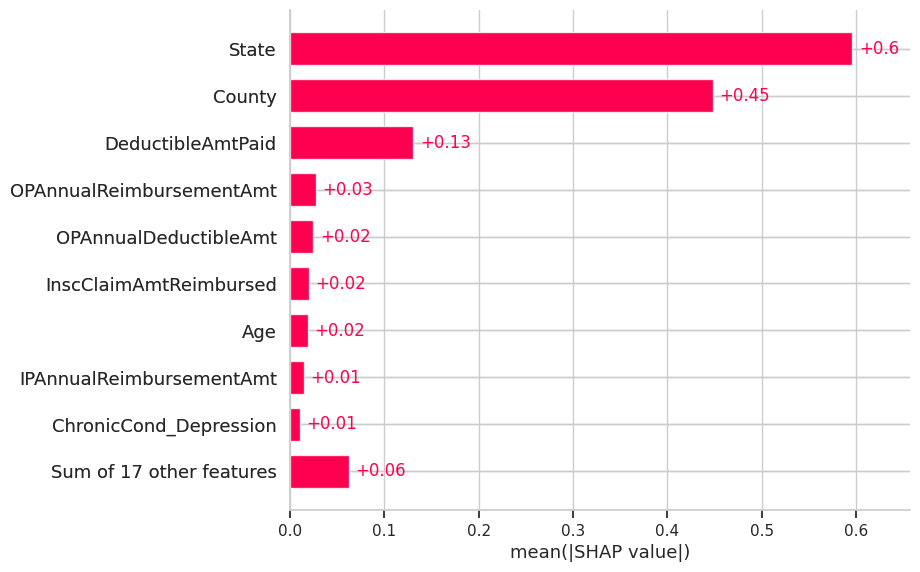

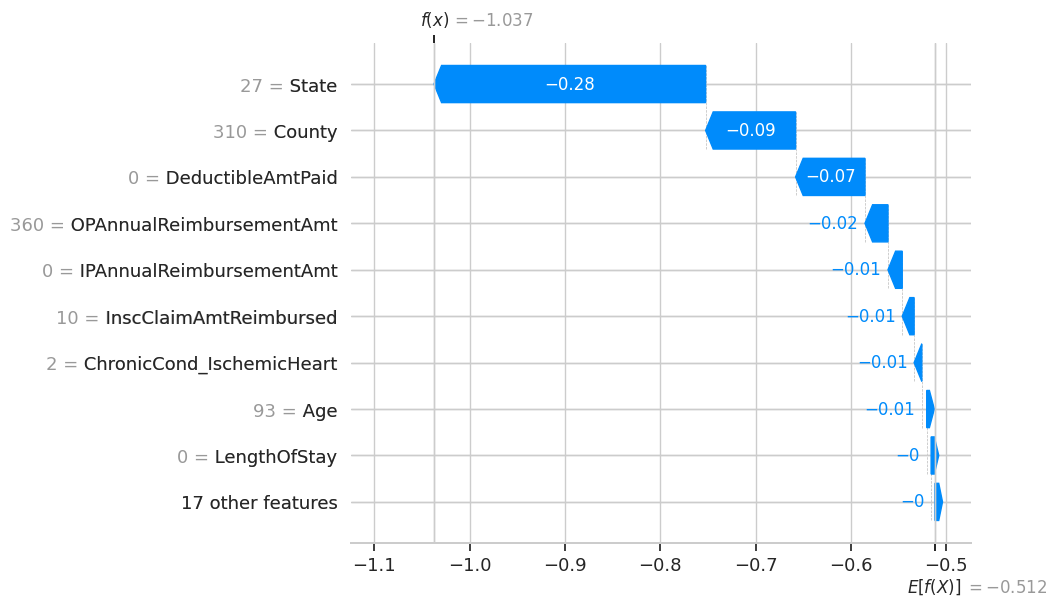

In [0]:
import shap

# Initialize SHAP explainer using trained model
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_val)

# Plot top features
shap.plots.bar(shap_values, max_display=10)

# Optional: Waterfall plot for a single sample
shap.plots.waterfall(shap_values[0])

Step 7. Text Embedding for Diagnosis Codes (NLP feature)


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import pandas as pd

# Step 1: Prepare diagnosis code columns
diag_cols = [col for col in train_full.columns if col.startswith("ClmDiagnosisCode_")]

# Step 2: Combine diagnosis codes into a single "document" per row
train_full["DiagDoc"] = train_full[diag_cols].astype(str).apply(lambda row: " ".join(row.dropna()), axis=1)

# Step 3: TF-IDF vectorization
tfidf = TfidfVectorizer()
diag_tfidf = tfidf.fit_transform(train_full["DiagDoc"])

# Step 4: Reduce dimensionality (e.g., 10 topics/components)
svd = TruncatedSVD(n_components=10, random_state=42)
diag_svd = svd.fit_transform(diag_tfidf)

# Step 5: Create a DataFrame of embeddings and join to main dataset
diag_features = pd.DataFrame(diag_svd, columns=[f"DiagTopic_{i}" for i in range(1, 11)])
diag_features.index = train_full.index  # align index
train_full = pd.concat([train_full, diag_features], axis=1)

# Step 6: Drop raw DiagDoc and (optionally) original code columns
train_full.drop(columns=["DiagDoc"], inplace=True)
# Optional: also drop diag_cols if not needed further

# Confirm shape
print("New shape with diagnosis embeddings:", train_full.shape)

New shape with diagnosis embeddings: (558211, 81)


Step 8. Retrain Model with Embedded Diagnosis Features

In [0]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Rebuild feature set with new columns included
feature_cols = [
    'InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'DiagnosisGroupCode',
    'LengthOfStay', 'Age',
    'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
    'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
    'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
    'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
    'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
    'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt',
    'State', 'County'
] + [f"DiagTopic_{i}" for i in range(1, 11)]  # Add NLP features

# Ensure label is binary
train_full['FraudLabel'] = train_full['PotentialFraud'].map({'No': 0, 'Yes': 1})
train_model = train_full[feature_cols + ['FraudLabel']].dropna()
X = train_model.drop(columns=['FraudLabel'])
y = train_model['FraudLabel']

# Fix object-type columns (e.g. DiagnosisGroupCode)
for col in X.select_dtypes(include='object').columns:
    X[col] = X[col].astype('category').cat.codes

# Split
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Train model
xgb_model_nlp = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model_nlp.fit(X_train, y_train)

# Predict
y_pred = xgb_model_nlp.predict(X_val)
y_proba = xgb_model_nlp.predict_proba(X_val)[:, 1]

# Evaluate
print("Classification Report (XGB + Diagnosis Embeddings):")
print(classification_report(y_val, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred))
print("\nAUC-ROC Score:", roc_auc_score(y_val, y_proba).round(4))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:03:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report (XGB + Diagnosis Embeddings):
              precision    recall  f1-score   support

           0       0.59      0.44      0.50      3336
           1       0.66      0.77      0.71      4579

    accuracy                           0.63      7915
   macro avg       0.62      0.61      0.61      7915
weighted avg       0.63      0.63      0.62      7915


Confusion Matrix:
[[1475 1861]
 [1033 3546]]

AUC-ROC Score: 0.6725


GPT-Based AI Agent

Training final model and calculate SHAP values

In [0]:
# Force the entire DataFrame to float64 type
X_val_encoded = X_val_encoded.astype('float64')

explainer = shap.Explainer(xgb_model, X_val_encoded)
shap_values = explainer(X_val_encoded)

100%|===================| 110777/110780 [06:11<00:00]       

In [0]:
def explain_with_gpt(row_index, shap_values, input_data):
    label = input_data.iloc[row_index]['FraudLabel']
    label_text = "Potential Fraud" if label == 1 else "No Fraud"

    shap_row = shap_values[row_index].values
    feature_names = shap_values.feature_names
    row_data = input_data.iloc[row_index]
    contribs = sorted(zip(feature_names, shap_row), key=lambda x: abs(x[1]), reverse=True)[:10]

    # Build base explanation
    if label == 1:
        prompt = f"""
You are a healthcare fraud detection analyst. A model has flagged this claim as *Potentially Fraudulent*. Below are the SHAP contributions showing what features influenced the prediction:

Top Feature Contributions:
"""
        for feat, val in contribs:
            prompt += f"- {feat}: {val:.4f}\n"
        prompt += "\nPlease explain why this claim might be fraudulent, based on these features."

    else:
        prompt = f"""
You are a healthcare fraud detection analyst. A model has *not* flagged this claim as fraudulent. Below are the SHAP contributions that influenced the model's decision:

Top Feature Contributions:
"""
        for feat, val in contribs:
            prompt += f"- {feat}: {val:.4f}\n"
        prompt += "\nExplain why this claim is likely legitimate or not flagged as fraudulent."

    # Send to GPT (chat API)
    response = openai.ChatCompletion.create(
        model="gpt-4",
        messages=[
            {"role": "system", "content": "You are an expert in healthcare fraud analytics."},
            {"role": "user", "content": prompt}
        ],
        temperature=0.5,
        max_tokens=300
    )

    return response.choices[0].message['content'].strip()

# Display widget
display(claim_dropdown, output)

Dropdown(description='Select Claim:', index=249, layout=Layout(width='50%'), options=(('Claim CLM37795', 0), (…

Output()

In [0]:
import nbformat

# Paths
input_path = "eda_and_modeling-1.ipynb"      # Your current notebook name
output_path = "eda_and_modeling_clean.ipynb"  # New cleaned notebook

# Load notebook
with open(input_path, "r", encoding="utf-8") as f:
    nb = nbformat.read(f, as_version=4)

# Remove top-level 'widgets' metadata
nb.metadata.pop("widgets", None)

# Remove widget metadata from each cell
for cell in nb.cells:
    if "metadata" in cell and "widgets" in cell["metadata"]:
        del cell["metadata"]["widgets"]

# Save cleaned version
with open(output_path, "w", encoding="utf-8") as f:
    nbformat.write(nb, f)

print(f"Fully cleaned and saved as: {output_path}")

Fully cleaned and saved as: eda_and_modeling_clean.ipynb


**Build the Provider-Patient Network in PySpark GraphFrames:**

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import lit
from graphframes import GraphFrame
# Step 1: Set Up GraphFrames in PySpark
spark = SparkSession.builder \
    .appName("Provider-Patient Network") \
    .config("spark.jars.packages", "graphframes:graphframes:0.8.2-spark3.1-s_2.12") \
    .getOrCreate()
# Step 2: Load Data
claims = spark.read.csv("dbfs:/FileStore/tables/train_full.csv", header=True, inferSchema=True)
# Step 3: Create Vertices (Nodes)
# Patients as vertices
patients = claims.select("BeneID").distinct().withColumnRenamed("BeneID", "id").withColumn("type", lit("patient"))

# Providers as vertices
providers = claims.select("Provider").distinct().withColumnRenamed("Provider", "id").withColumn("type", lit("provider"))

# Union all vertices
vertices = patients.union(providers)

# Step 4: Create Edges (Connections: patient → provider)
edges = claims.selectExpr(
    "BeneID as src",
    "Provider as dst",
    "InscClaimAmtReimbursed",
    "ClaimStartDt",
    "ClaimEndDt",
    "PotentialFraud"
)
# Step 5: Build GraphFrame
g = GraphFrame(vertices, edges)



In [0]:
# Step 6: Analyze Network for Default/Fraud Patterns
# High-degree Providers
g.degrees.orderBy("degree", ascending=False).show()


/databricks/spark/python/pyspark/sql/dataframe.py:149: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")


+--------+------+
|      id|degree|
+--------+------+
|PRV51459|  8240|
|PRV53797|  4739|
|PRV51574|  4444|
|PRV53918|  3588|
|PRV54895|  3436|
|PRV55215|  3393|
|PRV52064|  2844|
|PRV56011|  2833|
|PRV55004|  2399|
|PRV57306|  2315|
|PRV56560|  2313|
|PRV52030|  2275|
|PRV52649|  2156|
|PRV54772|  2115|
|PRV52628|  2098|
|PRV51369|  2083|
|PRV51347|  2067|
|PRV55039|  2058|
|PRV57103|  2049|
|PRV52019|  1961|
+--------+------+
only showing top 20 rows



In [0]:
# PageRank (Most “influential” providers or patients)
pr = g.pageRank(resetProbability=0.15, maxIter=10)
pr.vertices.orderBy("pagerank", ascending=False).show()


+--------+--------+------------------+
|      id|    type|          pagerank|
+--------+--------+------------------+
|PRV51459|provider| 890.3854450838807|
|PRV53797|provider| 531.4794640015671|
|PRV51574|provider|469.15946353471435|
|PRV53918|provider|419.53866921454073|
|PRV55215|provider|386.20738274744116|
|PRV54895|provider|337.77061712226896|
|PRV52064|provider|313.33933343760316|
|PRV56011|provider|308.46929339498126|
|PRV52019|provider|264.41469595807956|
|PRV57306|provider| 262.5110564960413|
|PRV56560|provider| 253.6700515259096|
|PRV55462|provider| 244.7689272338512|
|PRV52030|provider|242.60929609142167|
|PRV52628|provider|242.06804212236477|
|PRV52649|provider| 239.3166449636618|
|PRV55004|provider|239.24914519783064|
|PRV54742|provider|  234.876206889068|
|PRV54772|provider| 233.3183693359851|
|PRV57103|provider|233.09570423844562|
|PRV54075|provider|224.19249655199866|
+--------+--------+------------------+
only showing top 20 rows



In [0]:
# Label Propagation (Community detection)

communities = g.labelPropagation(maxIter=5)
communities.show()


+----------+-------+-------------+
|        id|   type|        label|
+----------+-------+-------------+
| BENE51738|patient|1047972020946|
| BENE22347|patient| 927712936626|
| BENE86049|patient|1357209666216|
| BENE60348|patient|1520418423518|
| BENE94462|patient|1125281432277|
| BENE49043|patient| 901943132851|
|BENE116375|patient|1408749273782|
|BENE158800|patient|1537598292660|
| BENE63579|patient| 249108103927|
| BENE65188|patient| 781684048537|
| BENE71356|patient| 352187318976|
|BENE143632|patient|  94489281268|
|BENE143337|patient| 515396076225|
| BENE72770|patient| 584115552928|
| BENE81790|patient| 584115552928|
|BENE121301|patient|  34359739100|
|BENE120437|patient| 446676599466|
| BENE99112|patient|1211180778186|
| BENE62576|patient|1606317769375|
|BENE134105|patient|  85899346684|
+----------+-------+-------------+
only showing top 20 rows



In [0]:
from graphframes import GraphFrame
from pyspark.sql.functions import col, lit

# Vertices: Patients, Doctors, and Providers
patients = claims.select(col("BeneID").alias("id")).distinct().withColumn("type", lit("patient"))

doctors = claims.selectExpr("AttendingPhysician as id") \
    .union(claims.selectExpr("OperatingPhysician as id")) \
    .union(claims.selectExpr("OtherPhysician as id")) \
    .distinct().withColumn("type", lit("doctor"))

providers = claims.select(col("Provider").alias("id")).distinct().withColumn("type", lit("provider"))

# Combine all vertices and remove duplicates
vertices = patients.union(doctors).union(providers).distinct()

# Edges: Define different types of relationships
e1 = claims.select(col("BeneID").alias("src"), col("AttendingPhysician").alias("dst")) \
    .withColumn("relationship", lit("visited"))

e2 = claims.select(col("BeneID").alias("src"), col("OperatingPhysician").alias("dst")) \
    .withColumn("relationship", lit("visited"))

e3 = claims.select(col("BeneID").alias("src"), col("OtherPhysician").alias("dst")) \
    .withColumn("relationship", lit("visited"))

e4 = claims.select(col("AttendingPhysician").alias("src"), col("Provider").alias("dst")) \
    .withColumn("relationship", lit("affiliated_with"))

e5 = claims.select(col("OperatingPhysician").alias("src"), col("Provider").alias("dst")) \
    .withColumn("relationship", lit("affiliated_with"))

e6 = claims.select(col("OtherPhysician").alias("src"), col("Provider").alias("dst")) \
    .withColumn("relationship", lit("affiliated_with"))

e7 = claims.select(col("BeneID").alias("src"), col("Provider").alias("dst")) \
    .withColumn("relationship", lit("used_provider"))

# Combine all edges and remove nulls
edges = e1.union(e2).union(e3).union(e4).union(e5).union(e6).union(e7).dropna()

# Construct the GraphFrame
g = GraphFrame(vertices, edges)


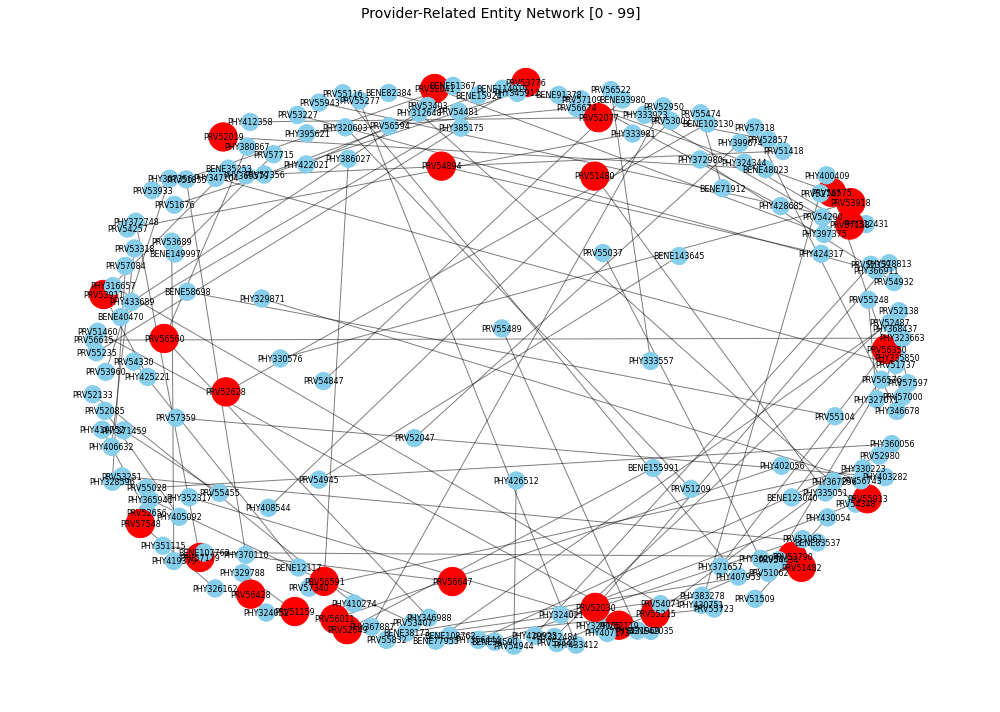

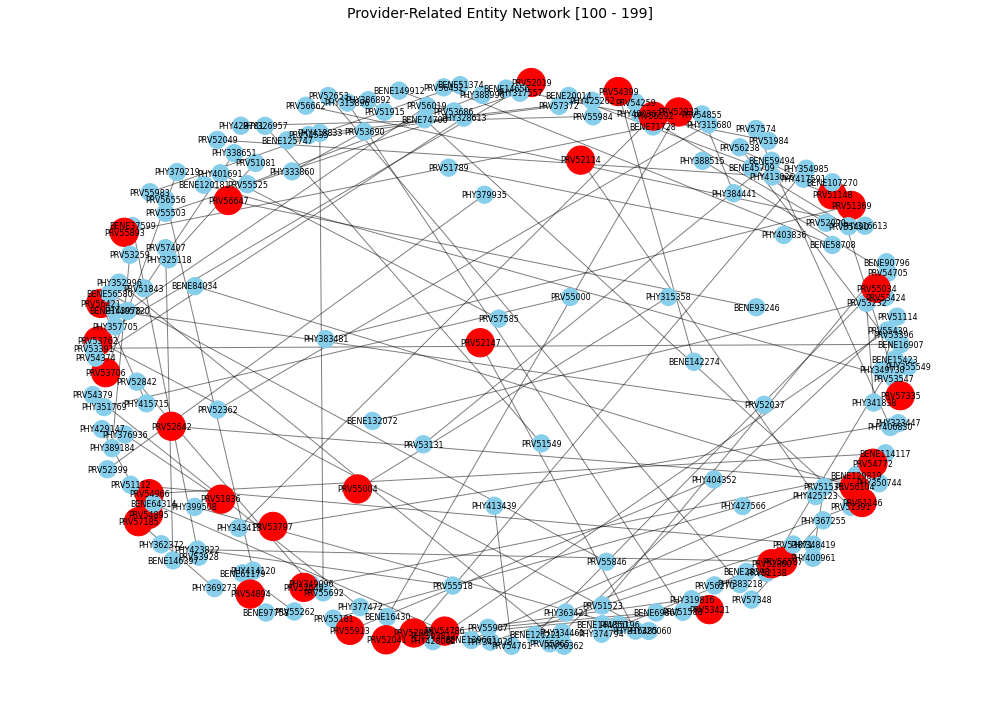

In [0]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Convert necessary columns to string and select only required columns
claims_filtered = claims.select(
    claims["Provider"].cast("string"),
    claims["BeneID"].cast("string"),
    claims["AttendingPhysician"].cast("string"),
    claims["OperatingPhysician"].cast("string"),
    claims["PotentialFraud"]
).dropna(how="any")  # drop rows with missing fields to avoid broken edges

# Identify fraudulent providers
fraud_ids = set(
    row['Provider'] for row in 
    claims_filtered.filter("PotentialFraud = 'Yes'").select("Provider").distinct().collect()
)

# Create edge list manually
edge_list = []

for row in claims_filtered.collect():
    provider = row['Provider']
    bene = row['BeneID']
    attend = row['AttendingPhysician']
    operate = row['OperatingPhysician']
    
    if bene:
        edge_list.append((provider, bene, "treats_patient"))
    if attend:
        edge_list.append((provider, attend, "attended_by"))
    if operate:
        edge_list.append((provider, operate, "operated_by"))

# Convert to pandas DataFrame
edges_df = pd.DataFrame(edge_list, columns=['src', 'dst', 'relationship'])

# Shuffle the edges
edges_df = edges_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Limit to 100 edges for 2 graphs
edges_per_graph = 100
total_edges = min(len(edges_df), edges_per_graph * 2)
edges_df = edges_df.iloc[:total_edges]

# Draw 2 subgraphs, each with 100 edges
for i in range(2):
    start_idx = i * edges_per_graph
    end_idx = min((i + 1) * edges_per_graph, total_edges)
    subset_edges = edges_df.iloc[start_idx:end_idx]

    G = nx.from_pandas_edgelist(subset_edges, source='src', target='dst', edge_attr='relationship')

    nodes_str = list(G.nodes())
    color_map = ['red' if node in fraud_ids else 'skyblue' for node in nodes_str]
    size_map = [800 if node in fraud_ids else 300 for node in nodes_str]

    pos = nx.spring_layout(G, seed=42, k=1)

    plt.figure(figsize=(14, 10))
    nx.draw_networkx_nodes(G, pos, node_color=color_map, node_size=size_map)
    nx.draw_networkx_edges(G, pos, alpha=0.5, width=1.0)
    nx.draw_networkx_labels(G, pos, font_size=8)

    plt.title(f"Provider-Related Entity Network [{start_idx} - {end_idx - 1}]", fontsize=14)
    plt.axis('off')
    plt.tight_layout()
    plt.show()
